In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import time
import numpy as np


from sklearn.metrics import roc_curve, roc_auc_score, classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, make_scorer, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn import metrics

In [16]:
df = pd.read_csv("alzheimers_disease_data.csv")
df

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [18]:
alzheimer = df.drop(columns="DoctorInCharge")
alzheimer

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [19]:
alzheimer

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0.238667,0,0,4.492838,1,0,0,0,0,1
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,8.687480,0,1,9.204952,0,0,0,0,0,1
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,1.972137,0,0,5.036334,0,0,0,0,0,1
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,5.173891,0,0,3.785399,0,0,0,0,1,1


In [20]:
alzheimer_float = alzheimer.select_dtypes(include=['float64'])
alzheimer_float_round = np.round(alzheimer_float)

In [21]:
alzheimer_float_round.columns = [col + "_round" for col in alzheimer_float_round.columns]
alzheimer_float_round = alzheimer_float_round.astype(int)

In [22]:
alzheimer_float_round

,BMI_round,AlcoholConsumption_round,PhysicalActivity_round,DietQuality_round,SleepQuality_round,CholesterolTotal_round,CholesterolLDL_round,CholesterolHDL_round,CholesterolTriglycerides_round,MMSE_round,FunctionalAssessment_round,ADL_round
0,23,13,6,1,9,242,56,34,162,21,7,2
1,27,5,8,1,7,231,193,79,295,21,7,3
2,18,20,8,2,10,284,153,70,84,7,6,7
3,34,12,8,7,8,160,65,68,278,14,9,6
4,21,18,6,1,6,238,93,57,291,14,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2144,39,2,4,7,8,280,95,61,235,1,0,4
2145,18,19,1,3,9,186,95,94,368,6,9,9
2146,15,5,10,8,6,237,156,100,295,17,2,5
2147,15,9,6,1,8,242,52,81,145,4,5,4


In [23]:
alzheimer_grafiques = pd.concat([alzheimer, alzheimer_float_round], axis = 1)
alzheimer_grafiques

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,PhysicalActivity_round,DietQuality_round,SleepQuality_round,CholesterolTotal_round,CholesterolLDL_round,CholesterolHDL_round,CholesterolTriglycerides_round,MMSE_round,FunctionalAssessment_round,ADL_round
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6,1,9,242,56,34,162,21,7,2
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,8,1,7,231,193,79,295,21,7,3
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,8,2,10,284,153,70,84,7,6,7
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8,7,8,160,65,68,278,14,9,6
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6,1,6,238,93,57,291,14,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,4,7,8,280,95,61,235,1,0,4
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,1,3,9,186,95,94,368,6,9,9
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,10,8,6,237,156,100,295,17,2,5
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,6,1,8,242,52,81,145,4,5,4


In [24]:
alzheimer_grafiques.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PatientID                       2149 non-null   int64  
 1   Age                             2149 non-null   int64  
 2   Gender                          2149 non-null   int64  
 3   Ethnicity                       2149 non-null   int64  
 4   EducationLevel                  2149 non-null   int64  
 5   BMI                             2149 non-null   float64
 6   Smoking                         2149 non-null   int64  
 7   AlcoholConsumption              2149 non-null   float64
 8   PhysicalActivity                2149 non-null   float64
 9   DietQuality                     2149 non-null   float64
 10  SleepQuality                    2149 non-null   float64
 11  FamilyHistoryAlzheimers         2149 non-null   int64  
 12  CardiovascularDisease           21

In [25]:
alzheimer_grafiques = alzheimer_grafiques.select_dtypes(exclude=['float64'])
alzheimer_grafiques

,PatientID,Age,Gender,Ethnicity,EducationLevel,Smoking,FamilyHistoryAlzheimers,CardiovascularDisease,Diabetes,Depression,...,PhysicalActivity_round,DietQuality_round,SleepQuality_round,CholesterolTotal_round,CholesterolLDL_round,CholesterolHDL_round,CholesterolTriglycerides_round,MMSE_round,FunctionalAssessment_round,ADL_round
0,4751,73,0,0,2,0,0,0,1,1,...,6,1,9,242,56,34,162,21,7,2
1,4752,89,0,0,0,0,0,0,0,0,...,8,1,7,231,193,79,295,21,7,3
2,4753,73,0,3,1,0,1,0,0,0,...,8,2,10,284,153,70,84,7,6,7
3,4754,74,1,0,1,1,0,0,0,0,...,8,7,8,160,65,68,278,14,9,6
4,4755,89,0,0,0,0,0,0,0,0,...,6,1,6,238,93,57,291,14,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,0,0,0,0,0,...,4,7,8,280,95,61,235,1,0,4
2145,6896,75,0,0,2,0,0,0,0,0,...,1,3,9,186,95,94,368,6,9,9
2146,6897,77,0,0,1,0,0,0,0,0,...,10,8,6,237,156,100,295,17,2,5
2147,6898,78,1,3,1,0,0,1,0,0,...,6,1,8,242,52,81,145,4,5,4


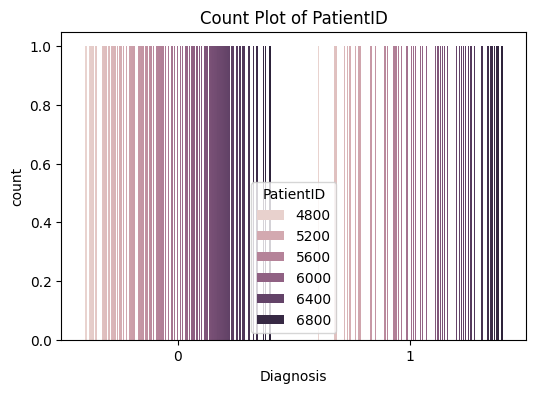

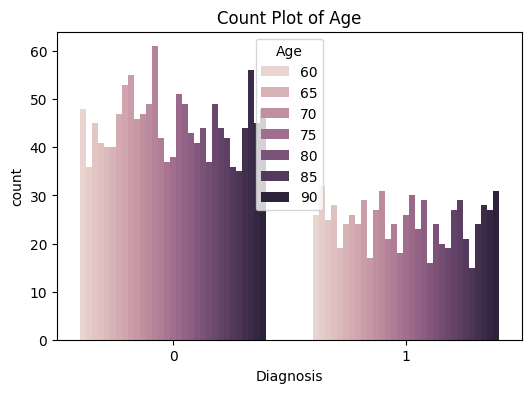

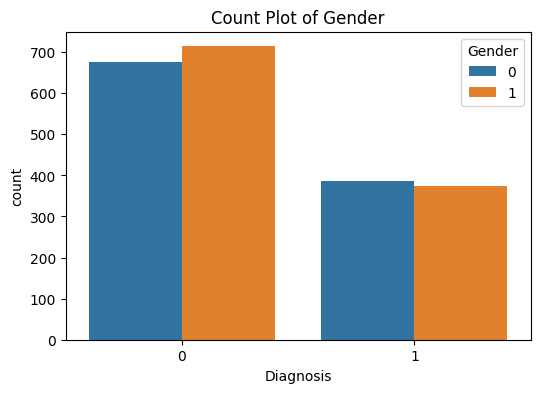

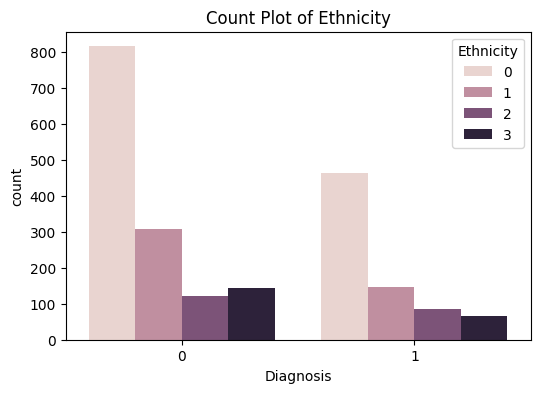

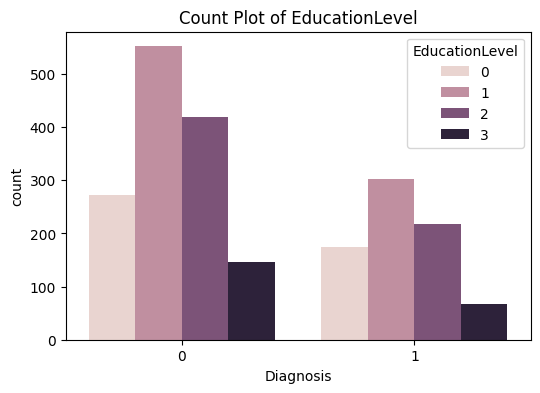

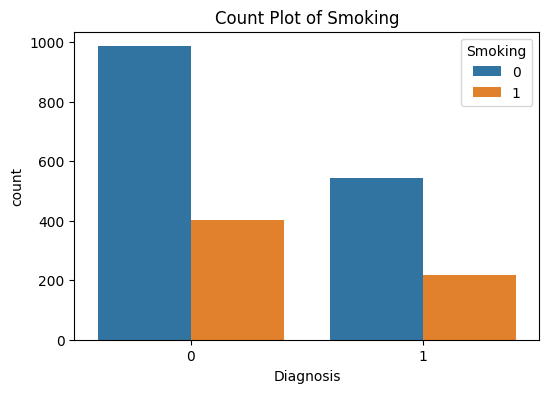

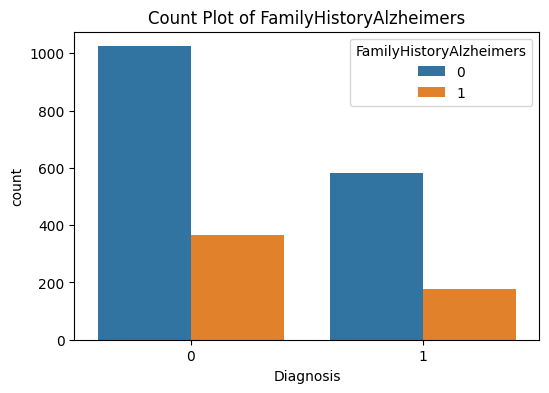

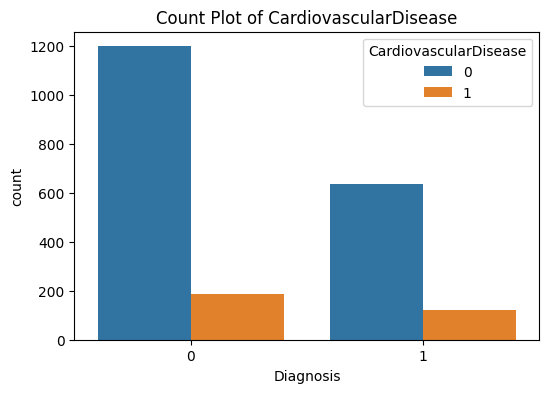

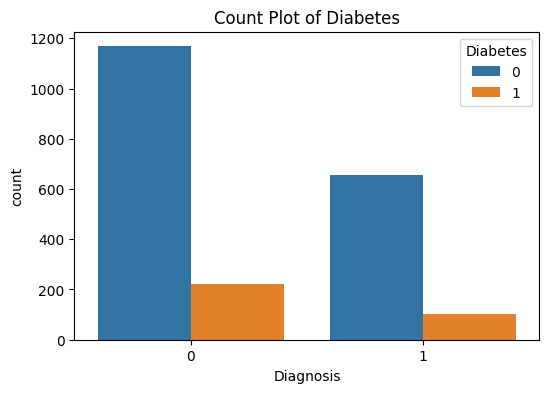

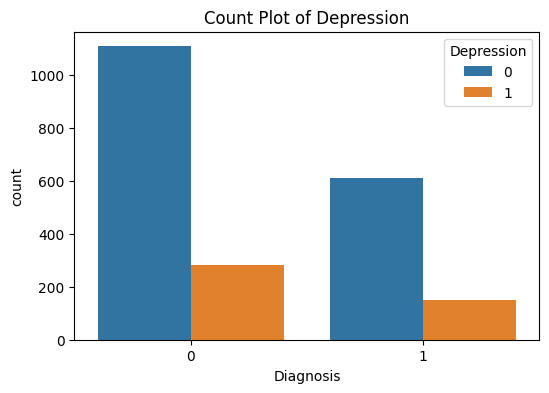

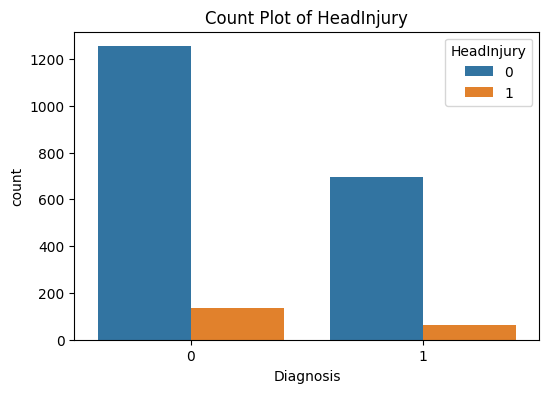

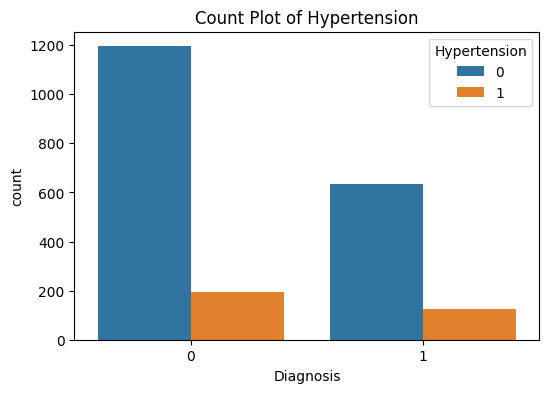

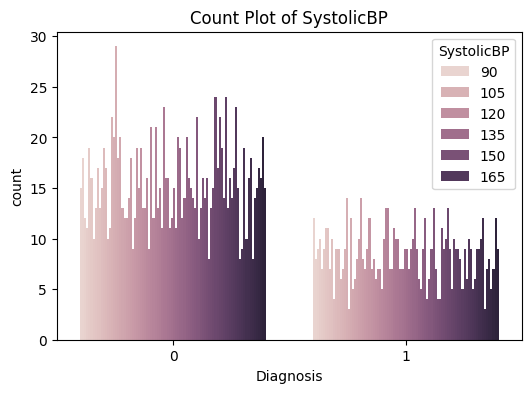

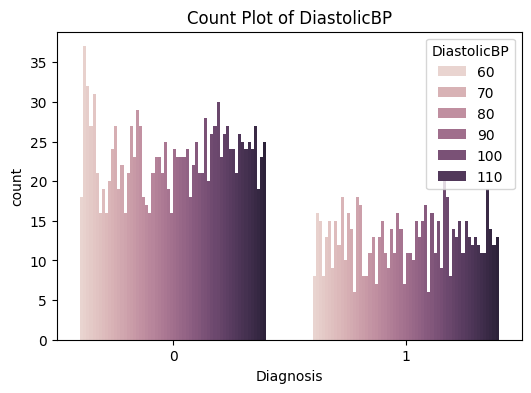

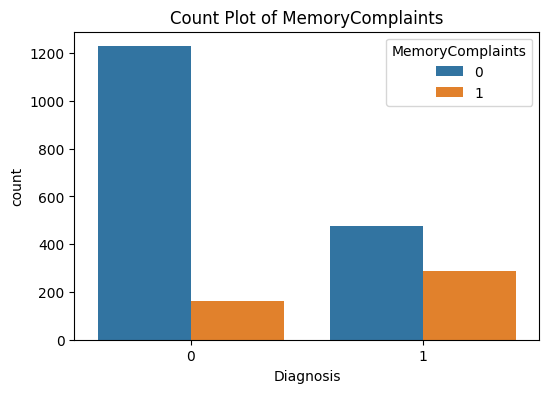

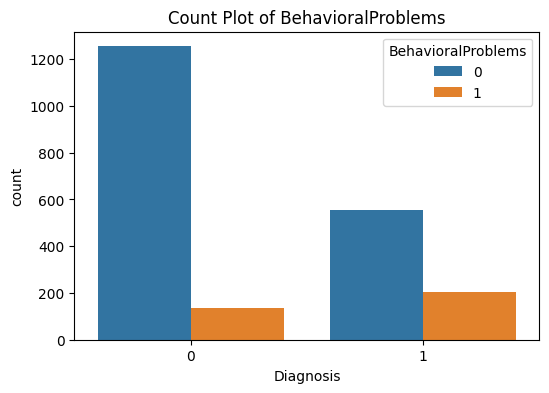

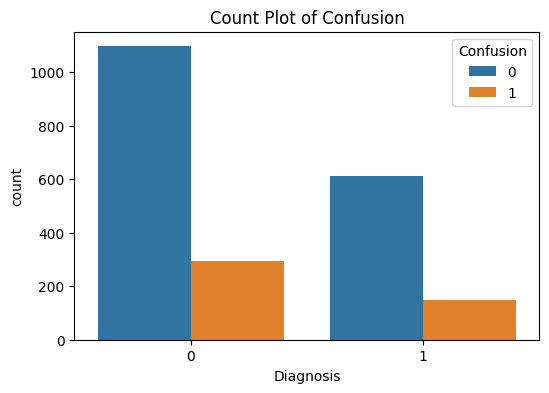

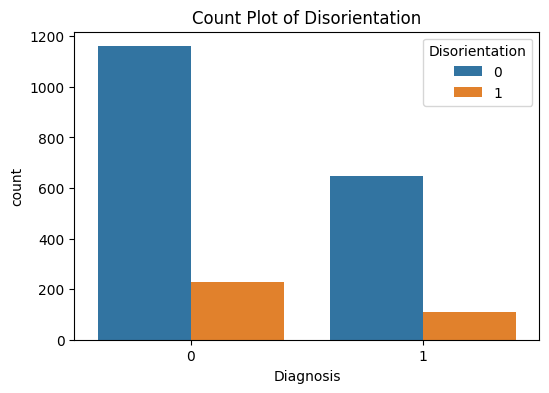

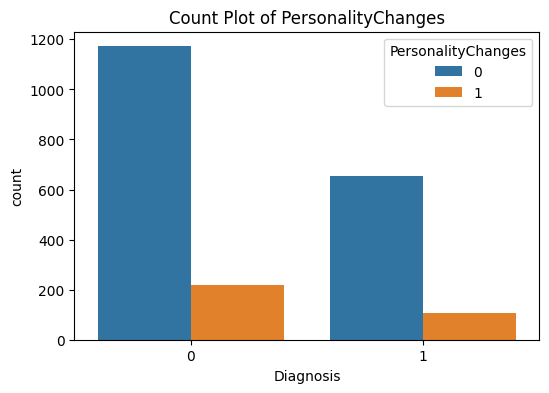

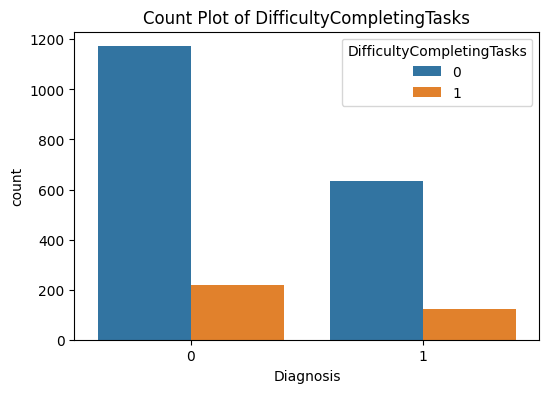

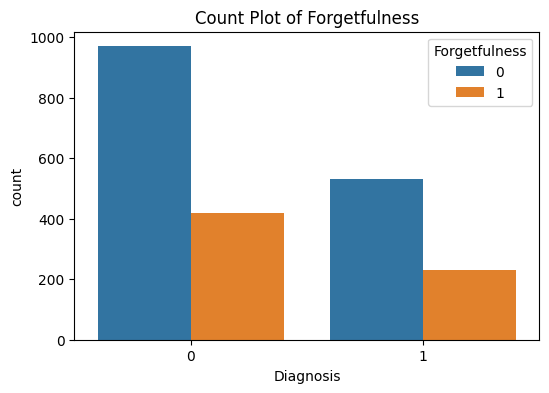

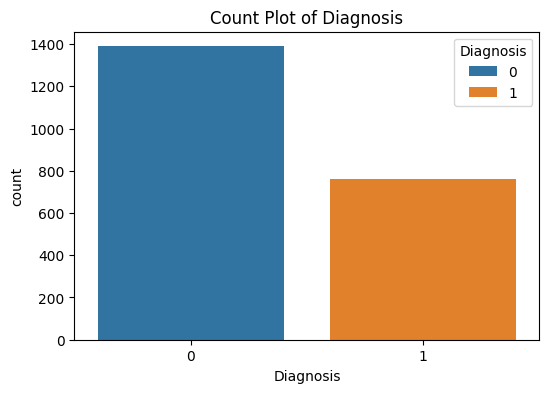

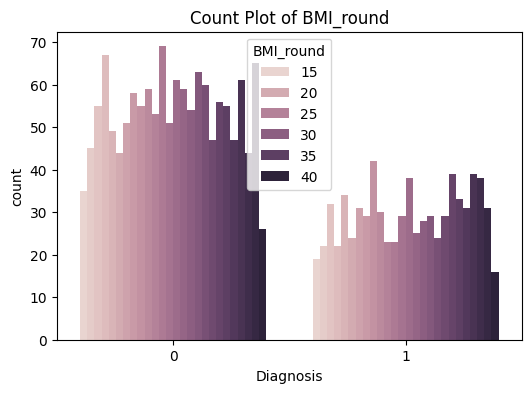

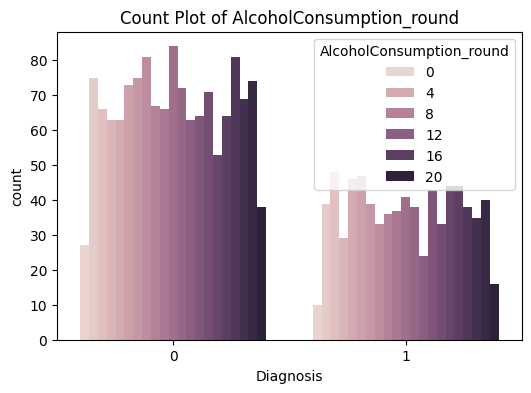

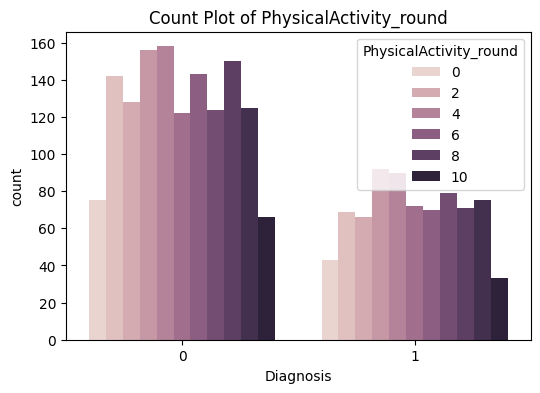

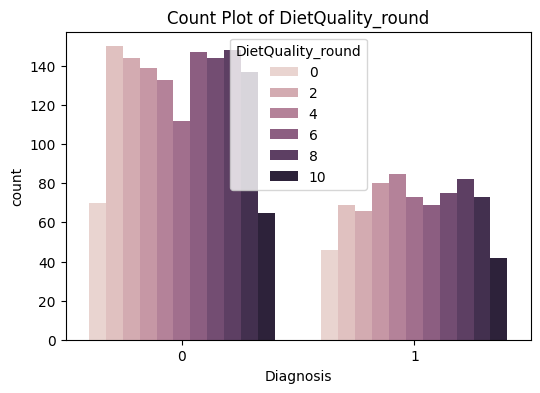

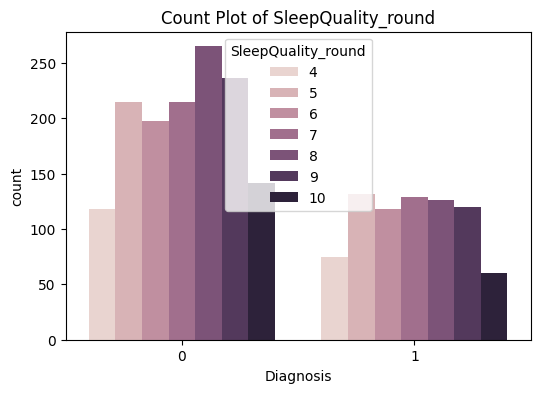

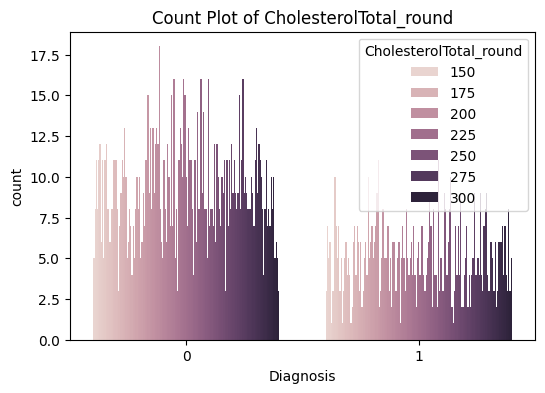

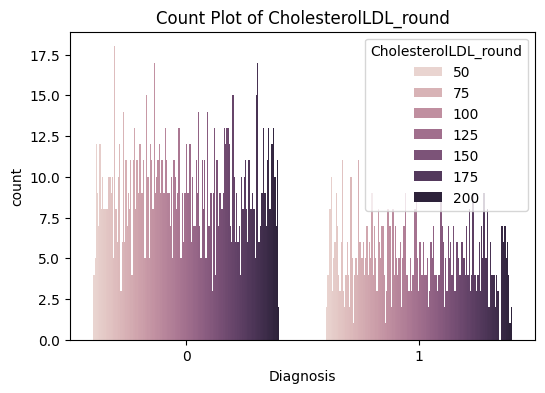

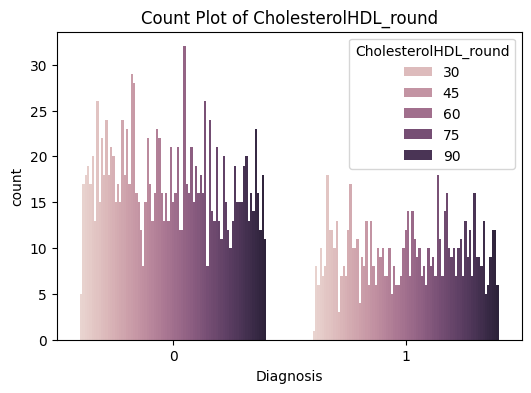

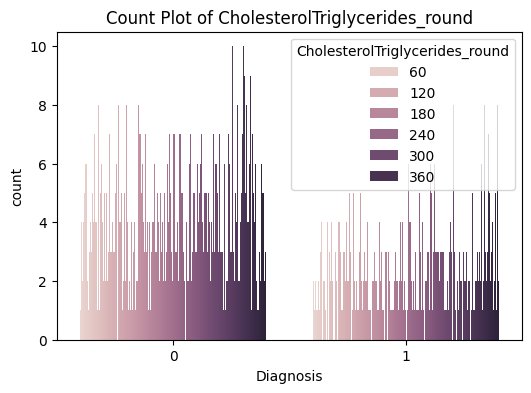

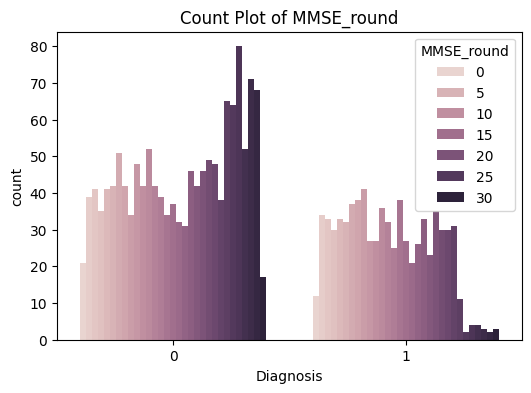

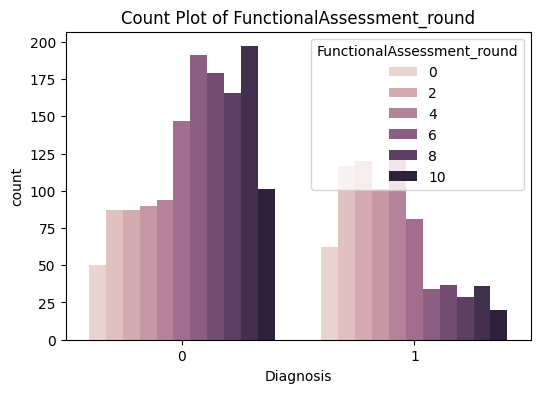

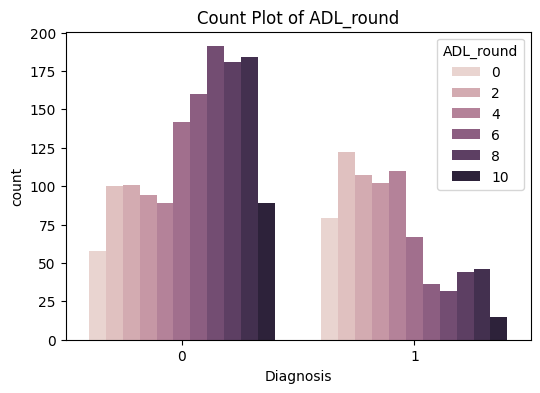

In [26]:
var = []
for c in alzheimer_grafiques.columns:
    if c != "Diagnosis" or c != "PatientID":
        var.append(c)

for v in var:
    plt.figure(figsize=(6,4))
    sns.countplot(x="Diagnosis", hue=v, data=alzheimer_grafiques)
    plt.title(f"Count Plot of {v}")
    plt.show()

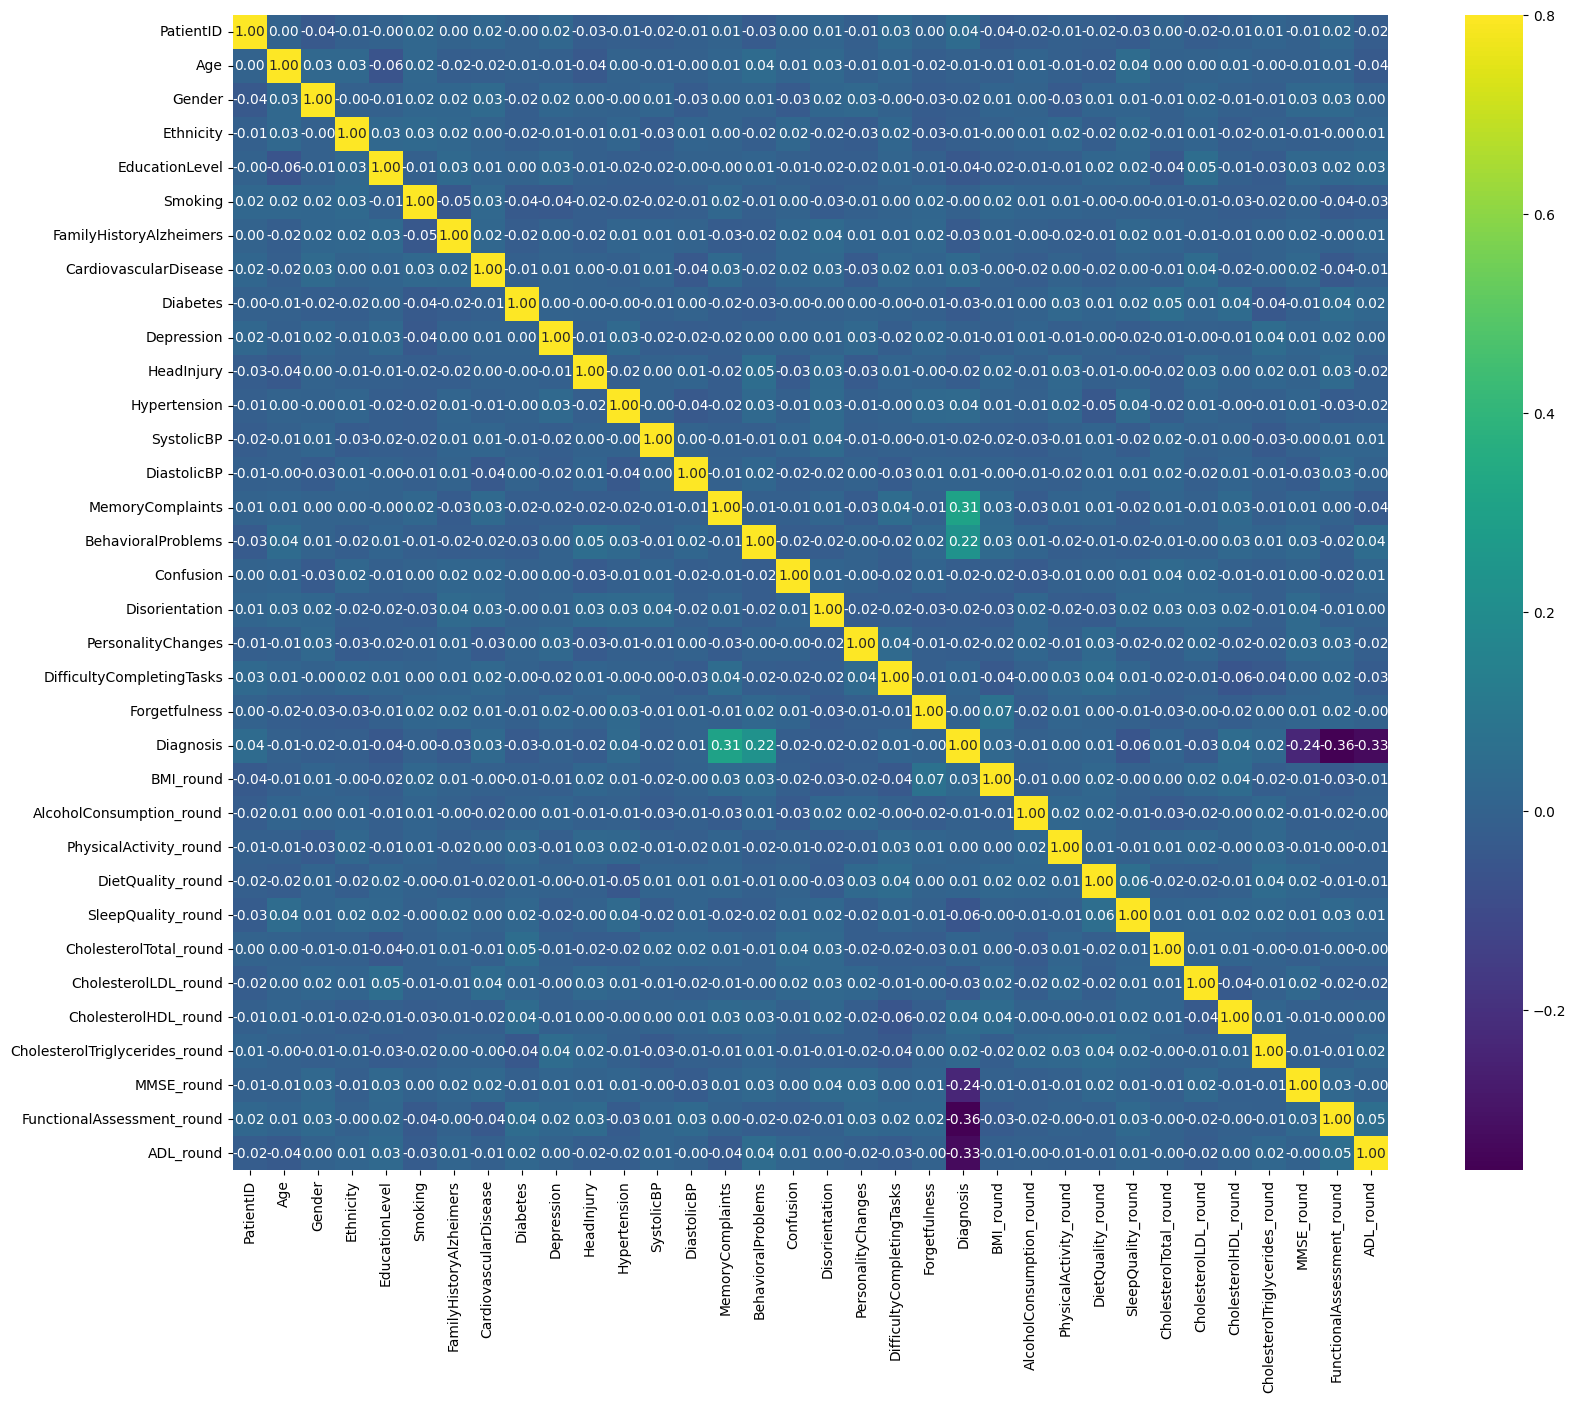

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Preparació del dataframe
indexes = [i for i in range(len(var))]
selected_features = alzheimer_grafiques[var]
df2 = pd.DataFrame(selected_features, columns=var)
df2["Diagnosis"] = alzheimer_grafiques["Diagnosis"]
df2["Diagnosis"] = df2["Diagnosis"].astype('category').cat.codes

# Correlació
corrmat = df2.corr()

# Ajustar la mida de la figura
plt.figure(figsize=(20, 15))  # Amplada 15, Altura 12 (pots modificar aquests valors)

# Dibuixar el heatmap
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt='.2f', cmap='viridis')

# Guardar la imatge
plt.savefig("corrplot.png", dpi=300, bbox_inches='tight')
plt.show()
